In [23]:
import pandas as pd
import numpy as np

In [32]:
def add_pitch_roll(df):
    df['roll'] = np.degrees(np.arctan2(df.acc_x, np.sqrt(df.acc_x**2 + df.acc_z**2)))
    df['pitch'] = np.degrees(np.arctan2(-df.acc_y, -df.acc_z))

In [33]:
waltz1 = pd.read_csv('../recorded_data/calibration_level_B176_2017-06-27.csv')
add_pitch_roll(waltz1)

In [34]:
waltz1.describe()

,mag_x,mag_y,mag_z,acc_x,acc_y,acc_z,roll,pitch
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,-390.356667,-2316.593333,1681.513333,3567.546667,2008.553333,-14517.270000,13.408344,-7.890744
std,286.390400,398.740804,153.742835,445.945856,505.354434,357.592831,1.609532,2.036137
min,-1017.000000,-3199.000000,1405.000000,2477.000000,657.000000,-15413.000000,9.253122,-14.595739
25%,-601.000000,-2661.500000,1548.000000,3248.250000,1681.000000,-14736.000000,12.244681,-9.323101
50%,-302.500000,-2237.500000,1676.000000,3539.000000,1997.000000,-14532.000000,13.352095,-7.854208
75%,-201.000000,-1956.500000,1828.750000,3895.250000,2365.250000,-14293.250000,14.566054,-6.547701
max,254.000000,-1751.000000,1946.000000,4643.000000,3480.000000,-13364.000000,17.349355,-2.474669


In [35]:
waltz2 = pd.read_csv('../recorded_data/calibration_level_B176_2017-06-27b.csv')
add_pitch_roll(waltz2)

In [36]:
waltz2.describe()

,mag_x,mag_y,mag_z,acc_x,acc_y,acc_z,roll,pitch
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,-320.770000,-2412.956667,1641.070000,3092.573333,2363.403333,-14539.286667,11.696514,-9.255061
std,224.522288,316.614630,156.901792,820.486831,651.617089,533.757750,2.962197,2.611222
min,-798.000000,-3322.000000,1378.000000,881.000000,496.000000,-16187.000000,3.650430,-16.781037
25%,-490.250000,-2600.000000,1495.000000,2553.750000,1983.250000,-14869.250000,9.688849,-10.795505
50%,-271.000000,-2292.500000,1637.000000,3042.000000,2384.000000,-14515.500000,11.764879,-9.324364
75%,-195.250000,-2179.000000,1769.750000,3660.250000,2724.250000,-14155.750000,14.014617,-7.819294
max,158.000000,-1974.000000,1931.000000,5031.000000,4069.000000,-13086.000000,18.453615,-1.842939


In [6]:
def calib_stats(df):
    x_range = df.mag_x.max() - df.mag_x.min()
    x_midpt = (df.mag_x.max() + df.mag_x.min()) / 2
    y_range = df.mag_y.max() - df.mag_y.min()
    y_midpt = (df.mag_y.max() + df.mag_y.min()) / 2
    print('x midpt', x_midpt, 'range', x_range)
    print('y midpt', y_midpt, 'range', y_range)
    

In [7]:
calib_stats(waltz1)

x midpt -381.5 range 1271
y midpt -2475.0 range 1448


In [8]:
calib_stats(waltz2)

x midpt -320.0 range 956
y midpt -2648.0 range 1348


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

In [67]:
def plot_calib_waltz(df):
    fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(14, 4))
    df.plot(x='mag_x', y='mag_y', xlim=(df.mag_x.min() - 100, df.mag_x.max() + 100), ax=ax0, legend=False)
    ax0.set_ylabel('mag y')
    df.plot(y='pitch', ax=ax1)
    df.plot(y='roll', ax=ax1)
    df.plot(y='mag_z', ax=ax2, legend=False)
    ax1.set_ylim(-30, 30)
    #return fig, (ax0, ax1)

These two calibration waltzes were in building 176, near the lifts. The x-y magnetic field readings are very messy.

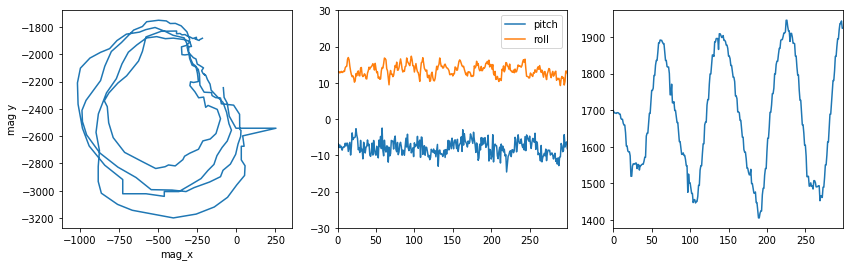

In [69]:
plot_calib_waltz(waltz1);

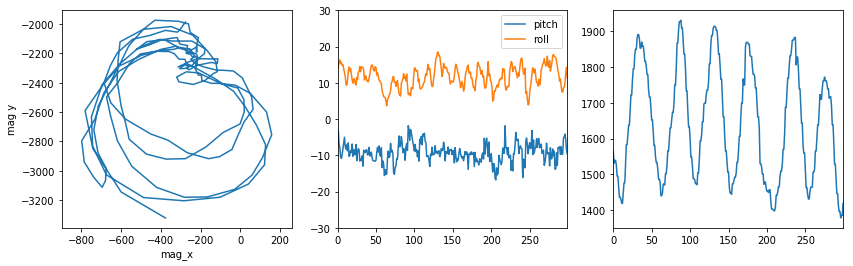

In [70]:
plot_calib_waltz(waltz2);

This one is from Eastleigh lakes, and the x-y field readings are much cleaner. We only did two rotations, though.

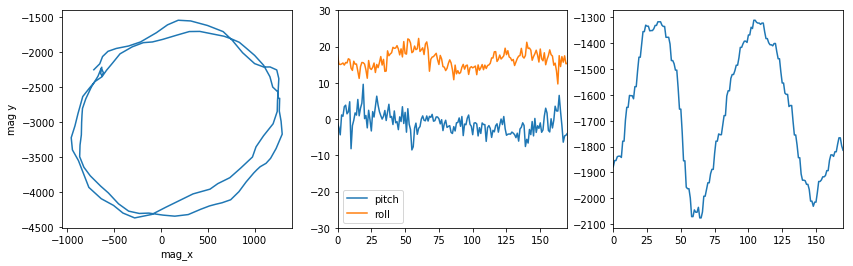

In [71]:
waltz_eastleigh = pd.read_csv('../recorded_data/calibration_level_eastleigh_2017-06-17.csv')
add_pitch_roll(waltz_eastleigh)
plot_calib_waltz(waltz_eastleigh)